<a href="https://colab.research.google.com/github/mhpolas/Data-science/blob/main/Customer%20Segmentation%20using%20KMeans%20Cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv('mall customers.csv')

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.rename(columns={'Annual Income (k$)':'income', 'Age':'age', 'Spending Score (1-100)':'score'}, inplace=True)

In [ ]:
df.head()

,CustomerID,Gender,age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df = df.drop('CustomerID',axis=1)

In [ ]:
df.head()

,Gender,age,income,score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [ ]:
df.to_csv('new.csv')

In [ ]:
df.describe() # descriptive statistics

,age,income,score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [ ]:
df.dtypes

Gender    object
age        int64
income     int64
score      int64
dtype: object

In [ ]:
df.isnull().sum()

Gender         0
age            0
income         0
score          0
new_cluster    0
dtype: int64

In [ ]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

In [ ]:
df.age.std() #standard deviation

13.96900733155888

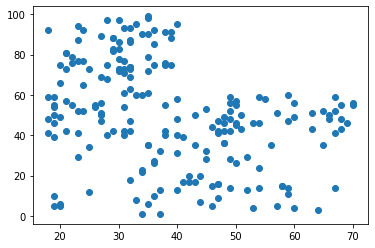

In [ ]:
#viz
plt.scatter(df.age, df.score)

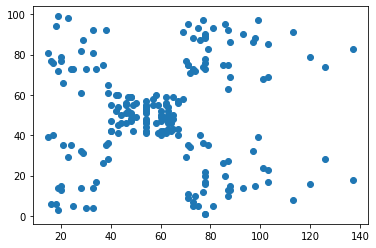

In [ ]:
#viz
plt.scatter(df.income, df.score)

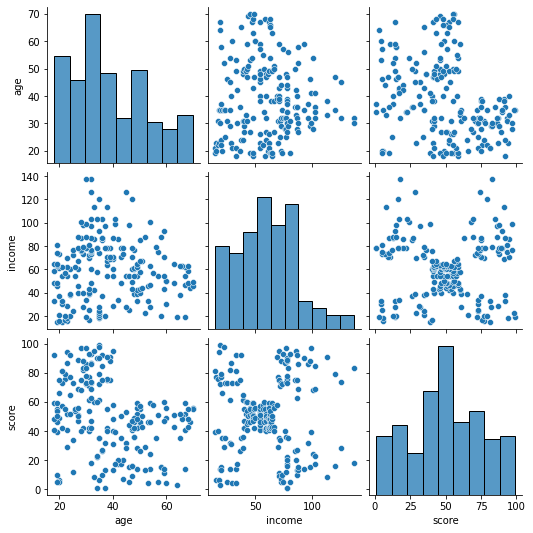

In [ ]:
#pairplot
import seaborn as sns
sns.pairplot(df[['age', 'income', 'score']])

# KMeans Cluser

In [ ]:
import sklearn.cluster as cluster

In [ ]:
kmeans = cluster.KMeans() # default, n_clusters=8

In [ ]:
predicted = kmeans.fit_predict(df[['income', 'score']])

In [ ]:
predicted

array([4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 6, 1, 6, 6,
       4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 6, 6, 0, 0, 6, 6, 6, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 2, 0, 2, 3, 2, 3, 2,
       0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7,
       5, 7], dtype=int32)

In [ ]:
df['cluster_1'] = predicted

In [ ]:
df.head()

,Gender,age,income,score,cluster_1
0,Male,19,15,39,4
1,Male,21,15,81,1
2,Female,20,16,6,4
3,Female,23,16,77,1
4,Female,31,17,40,4


In [ ]:
df.tail()

,Gender,age,income,score,cluster_1
195,Female,35,120,79,7
196,Female,45,126,28,5
197,Male,32,126,74,7
198,Male,32,137,18,5
199,Male,30,137,83,7


In [ ]:
center = kmeans.cluster_centers_

In [ ]:
center

array([[ 63.29545455,  47.06818182],
       [ 25.0952381 ,  80.04761905],
       [ 78.55172414,  82.17241379],
       [ 79.73913043,  13.39130435],
       [ 25.14285714,  19.52380952],
       [109.7       ,  22.        ],
       [ 46.80952381,  51.11904762],
       [109.7       ,  82.        ]])

In [ ]:
df0 = df[df.cluster_1 == 0]
df1 = df[df.cluster_1 == 1]
df2 = df[df.cluster_1 == 2]
df3 = df[df.cluster_1 == 3]
df4 = df[df.cluster_1 == 4]
df5 = df[df.cluster_1 == 5]
df6 = df[df.cluster_1 == 6]
df7 = df[df.cluster_1 == 7]

In [ ]:
df0.shape

(44, 5)

In [ ]:
df2.shape

(29, 5)

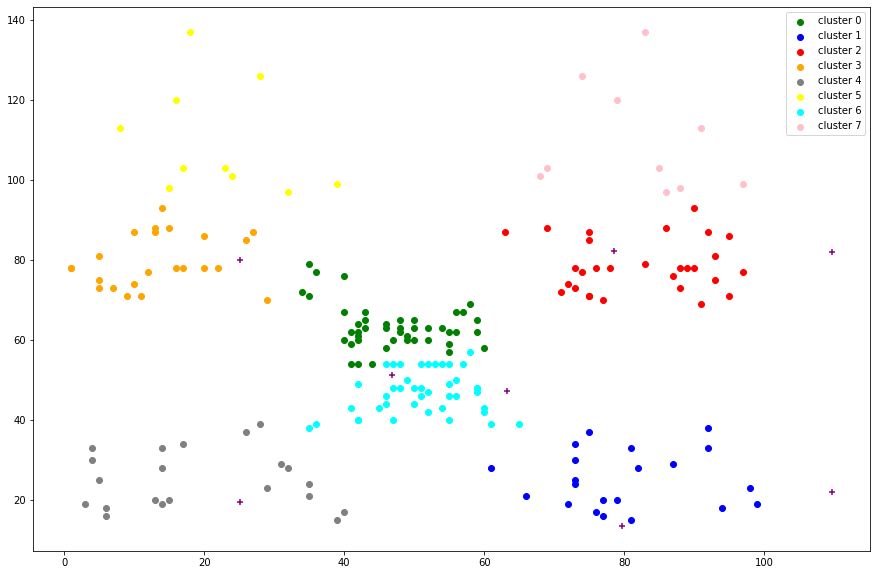

In [ ]:
plt.figure(figsize=(15,10))
plt.scatter(df0['score'], df0['income'], color='green', label='cluster 0')
plt.scatter(df1['score'], df1['income'], color='blue', label='cluster 1')
plt.scatter(df2['score'], df2['income'], color='red', label='cluster 2')
plt.scatter(df3['score'], df3['income'], color='orange', label='cluster 3')
plt.scatter(df4['score'], df4['income'], color='gray', label='cluster 4')
plt.scatter(df5['score'], df5['income'], color='yellow', label='cluster 5')
plt.scatter(df6['score'], df6['income'], color='cyan', label='cluster 6')
plt.scatter(df7['score'], df7['income'], color='pink', label='cluster 7')

plt.scatter(center[:,0] , center[:,1], color='purple', marker='+')

plt.legend()

# Select Optimal Number of Cluster

In [ ]:
wcss = [] 
clusters = range(1,15)
for k in clusters:
    km = cluster.KMeans(n_clusters=k)
    km.fit(df[['score','income']])
    wcss.append(km.inertia_)
    

In [ ]:
wcss

[269981.28,
 181363.59595959593,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37233.814510710006,
 30259.65720728547,
 25011.839349156588,
 22830.103330648664,
 20364.566998775146,
 17718.474081832144,
 15817.245013841315,
 14330.134400485133,
 12775.343451156685]

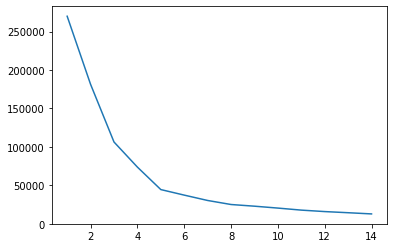

In [ ]:
plt.plot(clusters,wcss)

In [ ]:
#Knee
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from kneed import KneeLocator
kn = KneeLocator(clusters, wcss, curve='convex', direction='decreasing')

In [ ]:
kn.knee

5

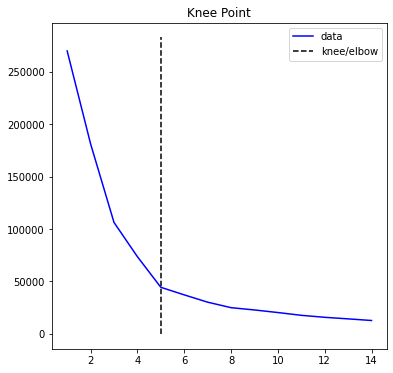

In [ ]:
kn.plot_knee()

In [ ]:
kmeans2 = cluster.KMeans(n_clusters=5) # default, n_clusters=5
predicted2 = kmeans2.fit_predict(df[['income', 'score']])

In [ ]:
df['finalcluster'] = df['cluster_1'] 

In [ ]:
df.drop(['finalcluster', 'cluster_1'], axis=1, inplace=True)

In [ ]:
df['new_cluster'] = predicted2

In [ ]:
df.head()

,Gender,age,income,score,new_cluster
0,Male,19,15,39,2
1,Male,21,15,81,4
2,Female,20,16,6,2
3,Female,23,16,77,4
4,Female,31,17,40,2


In [ ]:
center2 = kmeans2.cluster_centers_
center2

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571],
       [25.72727273, 79.36363636]])

In [ ]:
df0 = df[df.new_cluster == 0]
df1 = df[df.new_cluster == 1]
df2 = df[df.new_cluster == 2]
df3 = df[df.new_cluster == 3]
df4 = df[df.new_cluster == 4]


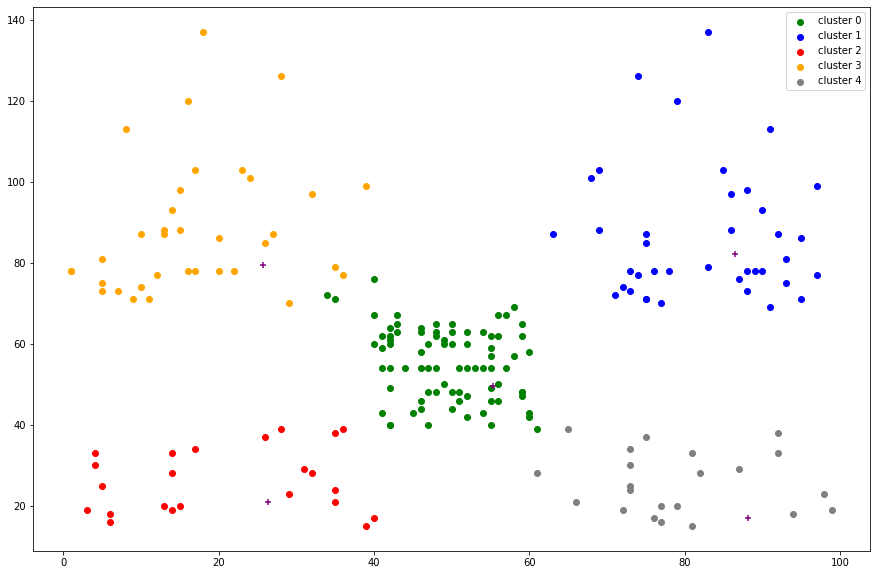

In [ ]:
plt.figure(figsize=(15,10))
plt.scatter(df0['score'], df0['income'], color='green', label='cluster 0')
plt.scatter(df1['score'], df1['income'], color='blue', label='cluster 1')
plt.scatter(df2['score'], df2['income'], color='red', label='cluster 2')
plt.scatter(df3['score'], df3['income'], color='orange', label='cluster 3')
plt.scatter(df4['score'], df4['income'], color='gray', label='cluster 4')

plt.scatter(center2[:,0] , center2[:,1], color='purple', marker='+')

plt.legend()

In [ ]:
kmeans2.predict([[15,40]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([2], dtype=int32)